# Boxplots for Results with R=20

This notebook creates boxplots for PEHE and PEHE_plug metrics across different dimensional settings (1d, 2d, 4d, 6d) from the results_20 folder.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print("Libraries loaded successfully")

Libraries loaded successfully


## Load Data from results_20 folder

In [15]:
# Define the base path
base_path = Path('../results_20')

# Define settings and models
settings = ['1d', '2d', '4d', '6d']
models = ['x_cb', 'x_rf']

# Load all raw results
all_data = []

for setting in settings:
    for model in models:
        raw_file = base_path / setting / model / 'raw_results.csv'
        if raw_file.exists():
            df = pd.read_csv(raw_file)
            df['setting'] = setting
            df['model'] = model
            all_data.append(df)
            print(f"Loaded: {setting}/{model} - {len(df)} rows")
        else:
            print(f"Warning: {raw_file} not found")

# Combine all data
combined_df = pd.concat(all_data, ignore_index=True)
print(f"\nTotal rows loaded: {len(combined_df)}")
print(f"\nData shape: {combined_df.shape}")
print(f"\nColumns: {combined_df.columns.tolist()}")
print(f"\nFirst few rows:")
combined_df.head()

Loaded: 1d/x_cb - 60 rows
Loaded: 1d/x_rf - 60 rows
Loaded: 2d/x_cb - 60 rows
Loaded: 2d/x_rf - 60 rows
Loaded: 4d/x_cb - 40 rows
Loaded: 4d/x_rf - 40 rows
Loaded: 6d/x_cb - 40 rows
Loaded: 6d/x_rf - 40 rows

Total rows loaded: 400

Data shape: (400, 7)

Columns: ['learner', 'tuner', 'rep', 'pehe', 'pehe_plug', 'setting', 'model']

First few rows:


,learner,tuner,rep,pehe,pehe_plug,setting,model
0,x_cb,grid,0,0.079249,0.250171,1d,x_cb
1,x_cb,grid,1,0.133617,0.422495,1d,x_cb
2,x_cb,grid,2,0.193811,0.437912,1d,x_cb
3,x_cb,grid,3,0.172587,0.298451,1d,x_cb
4,x_cb,grid,4,0.093824,0.288762,1d,x_cb


## Summary Statistics

In [16]:
# Display summary statistics
print("Summary by setting, model, and tuner:")
summary = combined_df.groupby(['setting', 'model', 'tuner']).agg({
    'pehe': ['mean', 'std', 'min', 'max'],
    'pehe_plug': ['mean', 'std', 'min', 'max']
}).round(4)
print(summary)

Summary by setting, model, and tuner:
                        pehe                         pehe_plug          \
                        mean     std     min     max      mean     std   
setting model tuner                                                      
1d      x_cb  bayes   0.1758  0.0392  0.0991  0.2703    0.4429  0.0916   
              grid    0.1302  0.0416  0.0792  0.2464    0.3358  0.0746   
              random  0.1352  0.0413  0.0818  0.2490    0.3565  0.0763   
        x_rf  bayes   0.1452  0.0367  0.0855  0.2161    0.3598  0.1223   
              grid    0.1448  0.0357  0.0852  0.2161    0.3611  0.1215   
              random  0.1453  0.0379  0.0805  0.2210    0.3593  0.1239   
2d      x_cb  bayes   0.1236  0.0394  0.0626  0.2219    0.3359  0.0921   
              grid    0.1243  0.0412  0.0605  0.2222    0.3321  0.0930   
              random  0.1916  0.0526  0.1040  0.2890    0.4315  0.1096   
        x_rf  bayes   0.1389  0.0376  0.0716  0.2129    0.3379  0.1198   


## Create Boxplots for Each Dimensional Setting

We'll create boxplots for PEHE and PEHE_plug for each dimensional setting (1d, 2d, 4d, 6d).

In [17]:
# Create a combined label for model and tuner
combined_df['model_tuner'] = combined_df['model'] + '_' + combined_df['tuner']

# Define colors for different tuners
tuner_colors = {
    'grid': '#2E86AB',
    'random': '#A23B72',
    'bayes': '#F18F01'
}

# Create color palette based on tuner
def get_color(model_tuner):
    tuner = model_tuner.split('_')[-1]
    return tuner_colors.get(tuner, '#888888')

### PEHE Boxplots by Dimensional Setting

/var/folders/yg/yd_rkzv93459x04g3jzsjwcr0000gn/T/ipykernel_91447/2589168254.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='model_tuner', y='pehe', ax=ax, palette=[get_color(mt) for mt in data['model_tuner'].unique()])
/var/folders/yg/yd_rkzv93459x04g3jzsjwcr0000gn/T/ipykernel_91447/2589168254.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='model_tuner', y='pehe', ax=ax, palette=[get_color(mt) for mt in data['model_tuner'].unique()])
/var/folders/yg/yd_rkzv93459x04g3jzsjwcr0000gn/T/ipykernel_91447/2589168254.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` a

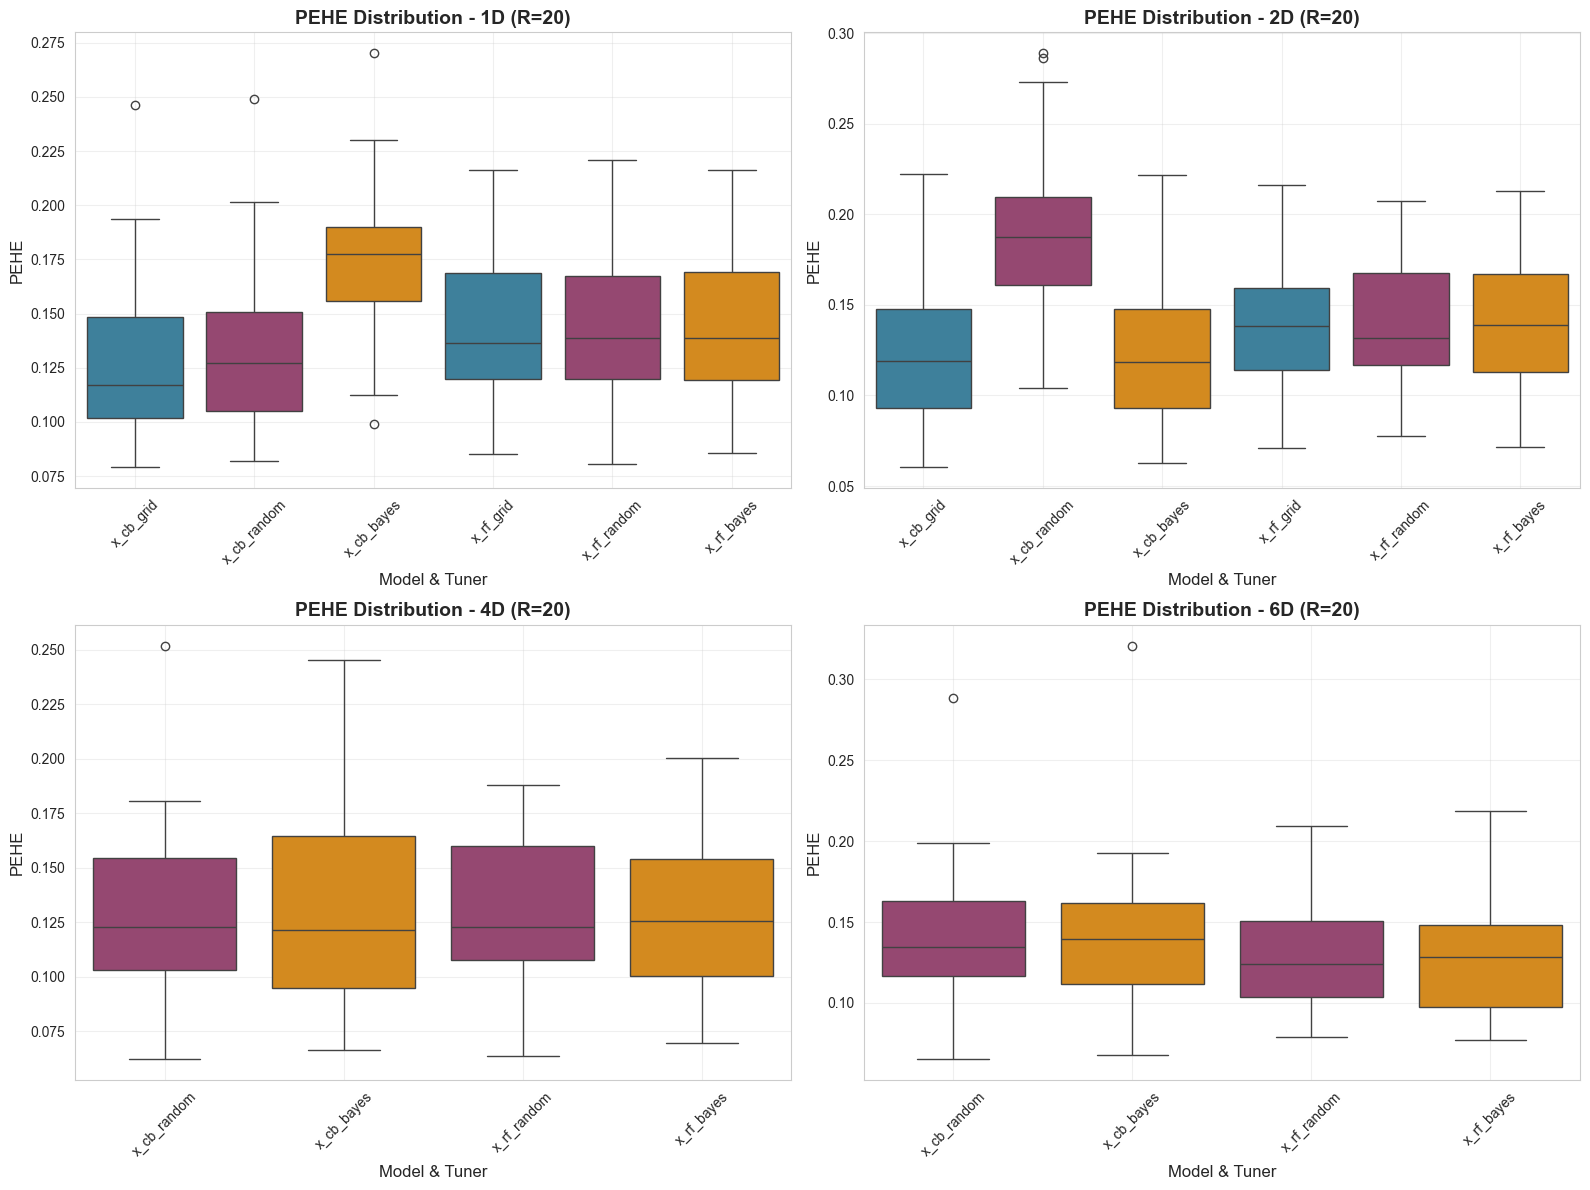

Saved: pehe_boxplot_r20.png


In [18]:
# Create boxplots for PEHE across all settings
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, setting in enumerate(settings):
    ax = axes[idx]
    data = combined_df[combined_df['setting'] == setting]
    
    # Create boxplot
    sns.boxplot(data=data, x='model_tuner', y='pehe', ax=ax, palette=[get_color(mt) for mt in data['model_tuner'].unique()])
    
    ax.set_title(f'PEHE Distribution - {setting.upper()} (R=20)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Model & Tuner', fontsize=12)
    ax.set_ylabel('PEHE', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('pehe_boxplot_r20.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: pehe_boxplot_r20.png")

### PEHE_plug Boxplots by Dimensional Setting

/var/folders/yg/yd_rkzv93459x04g3jzsjwcr0000gn/T/ipykernel_91447/2666777228.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='model_tuner', y='pehe_plug', ax=ax, palette=[get_color(mt) for mt in data['model_tuner'].unique()])
/var/folders/yg/yd_rkzv93459x04g3jzsjwcr0000gn/T/ipykernel_91447/2666777228.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='model_tuner', y='pehe_plug', ax=ax, palette=[get_color(mt) for mt in data['model_tuner'].unique()])
/var/folders/yg/yd_rkzv93459x04g3jzsjwcr0000gn/T/ipykernel_91447/2666777228.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable 

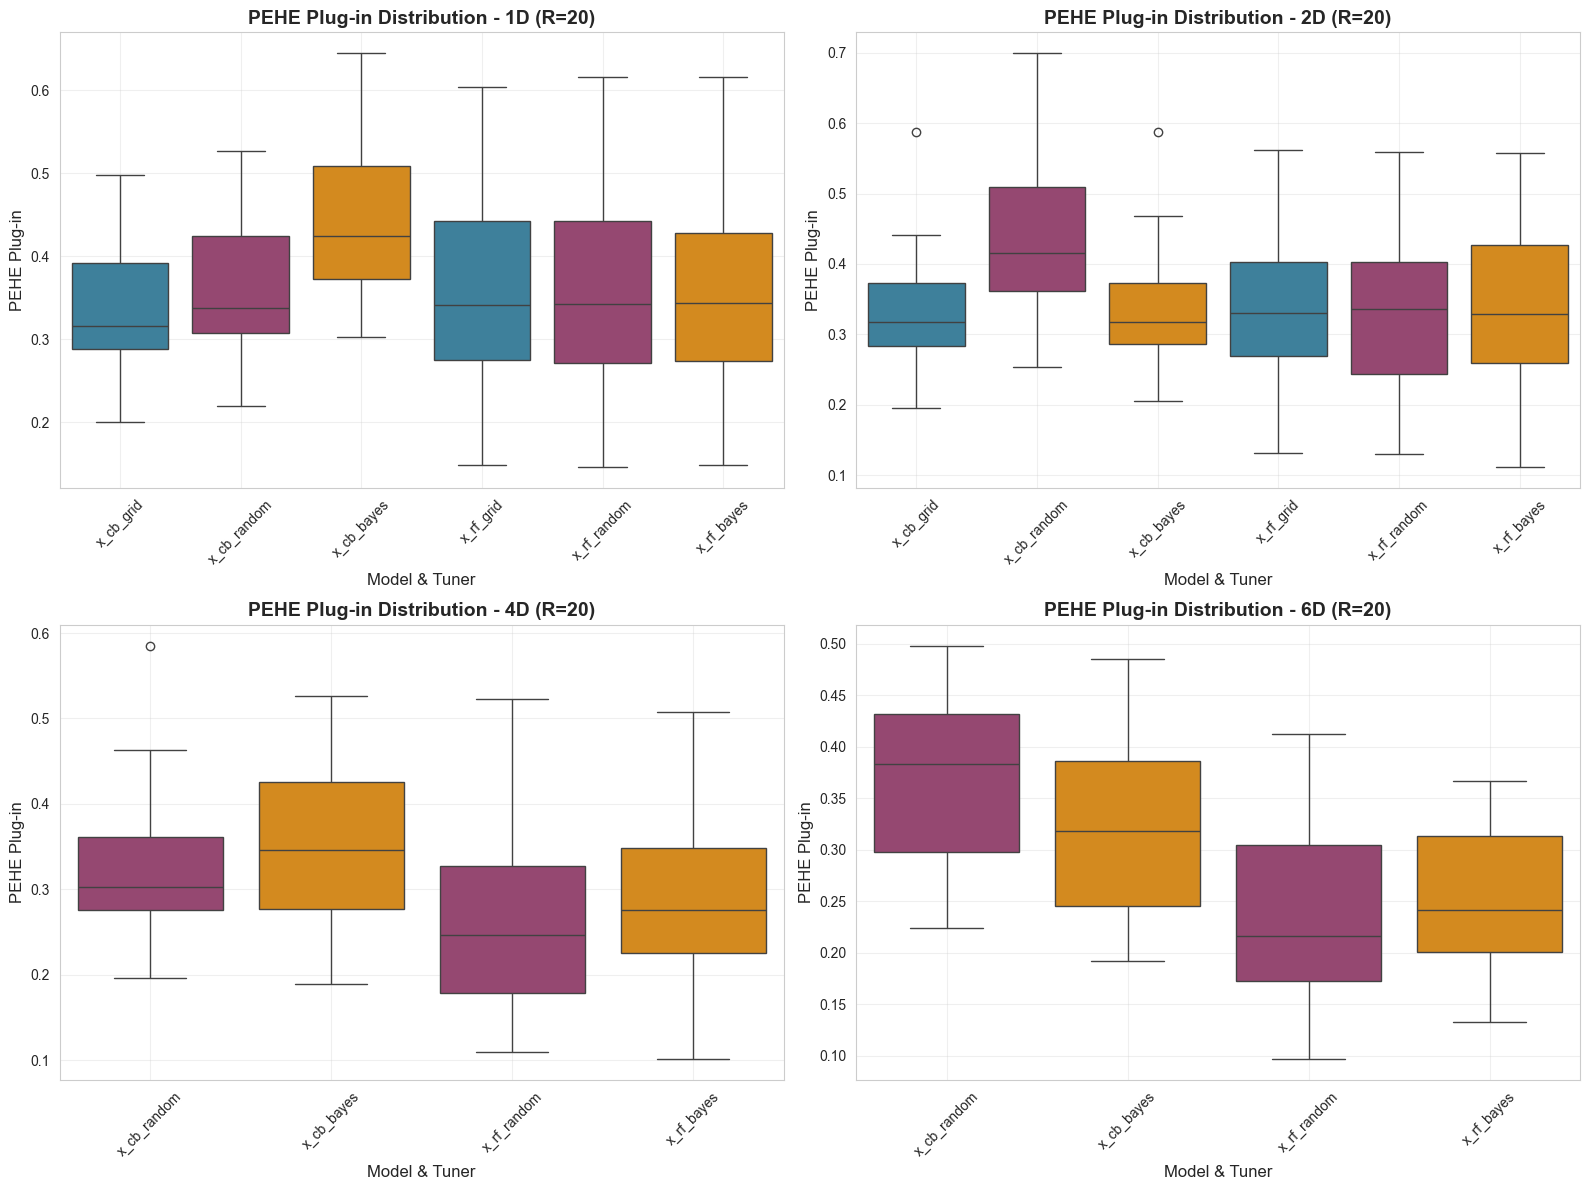

Saved: pehe_plug_boxplot_r20.png


In [19]:
# Create boxplots for PEHE_plug across all settings
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, setting in enumerate(settings):
    ax = axes[idx]
    data = combined_df[combined_df['setting'] == setting]
    
    # Create boxplot
    sns.boxplot(data=data, x='model_tuner', y='pehe_plug', ax=ax, palette=[get_color(mt) for mt in data['model_tuner'].unique()])
    
    ax.set_title(f'PEHE Plug-in Distribution - {setting.upper()} (R=20)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Model & Tuner', fontsize=12)
    ax.set_ylabel('PEHE Plug-in', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('pehe_plug_boxplot_r20.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: pehe_plug_boxplot_r20.png")

## Individual Setting Boxplots

Create separate boxplots for each dimensional setting, with one plot per model showing both PEHE and PEHE_plug.

In [20]:
# Reshape data for grouped boxplots
# We need to melt the dataframe to have metric as a variable
plot_data = combined_df.melt(
    id_vars=['setting', 'model', 'tuner', 'learner', 'rep'],
    value_vars=['pehe', 'pehe_plug'],
    var_name='metric',
    value_name='value'
)

print("Reshaped data for plotting:")
print(plot_data.head())

Reshaped data for plotting:
  setting model tuner learner  rep metric     value
0      1d  x_cb  grid    x_cb    0   pehe  0.079249
1      1d  x_cb  grid    x_cb    1   pehe  0.133617
2      1d  x_cb  grid    x_cb    2   pehe  0.193811
3      1d  x_cb  grid    x_cb    3   pehe  0.172587
4      1d  x_cb  grid    x_cb    4   pehe  0.093824


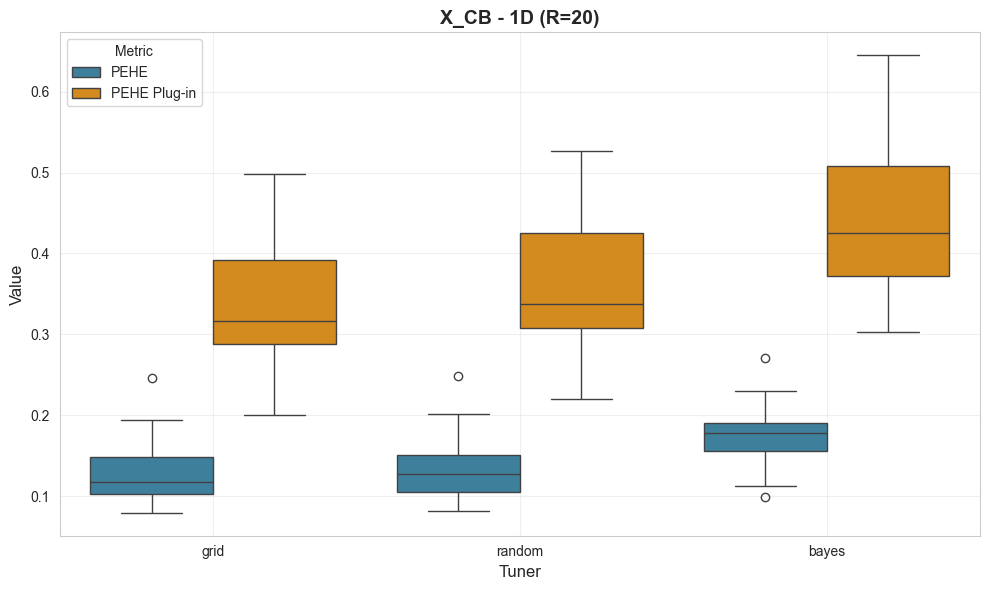

Saved: 1d_x_cb_boxplot_r20.png


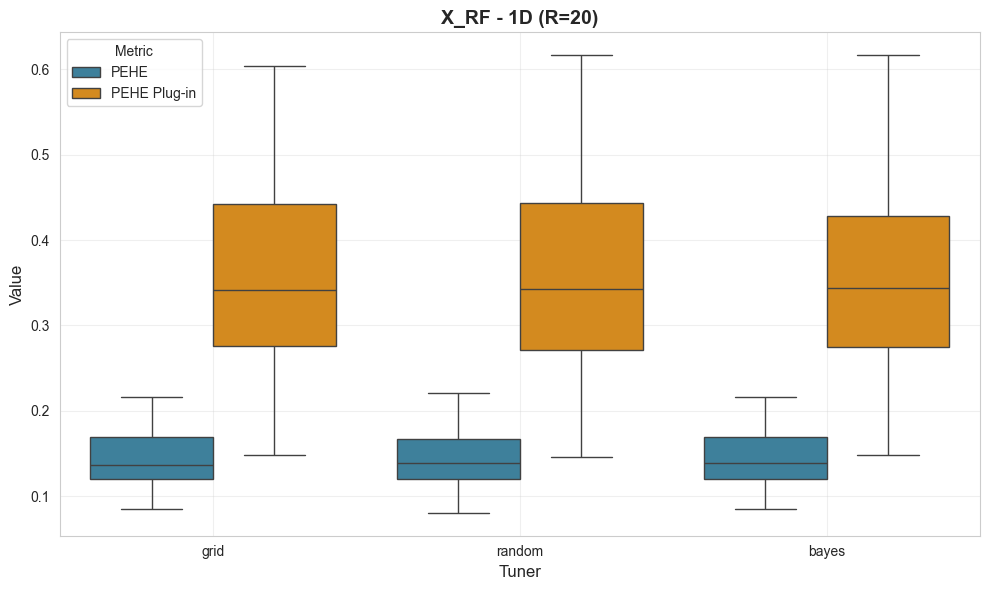

Saved: 1d_x_rf_boxplot_r20.png


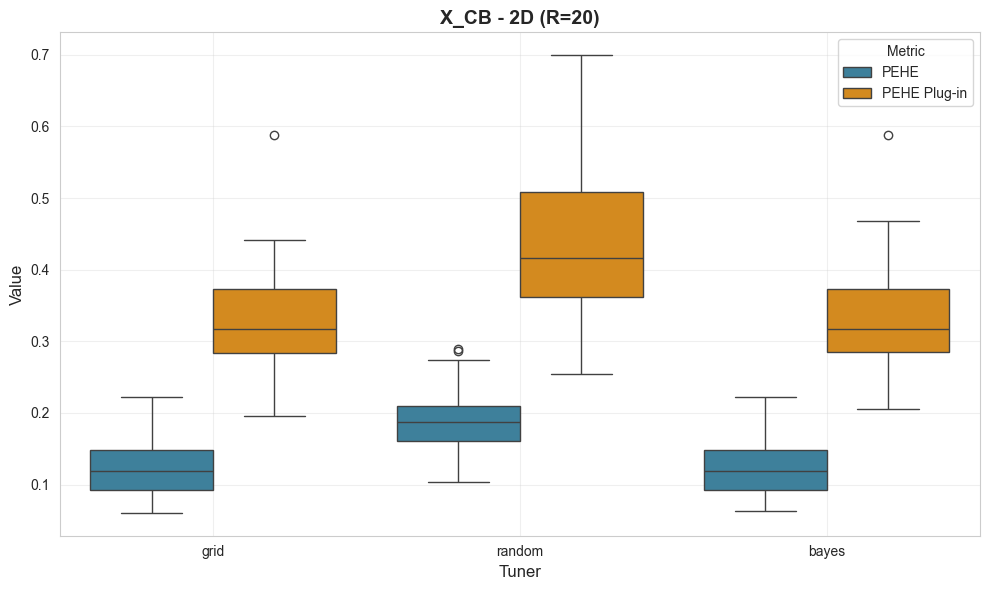

Saved: 2d_x_cb_boxplot_r20.png


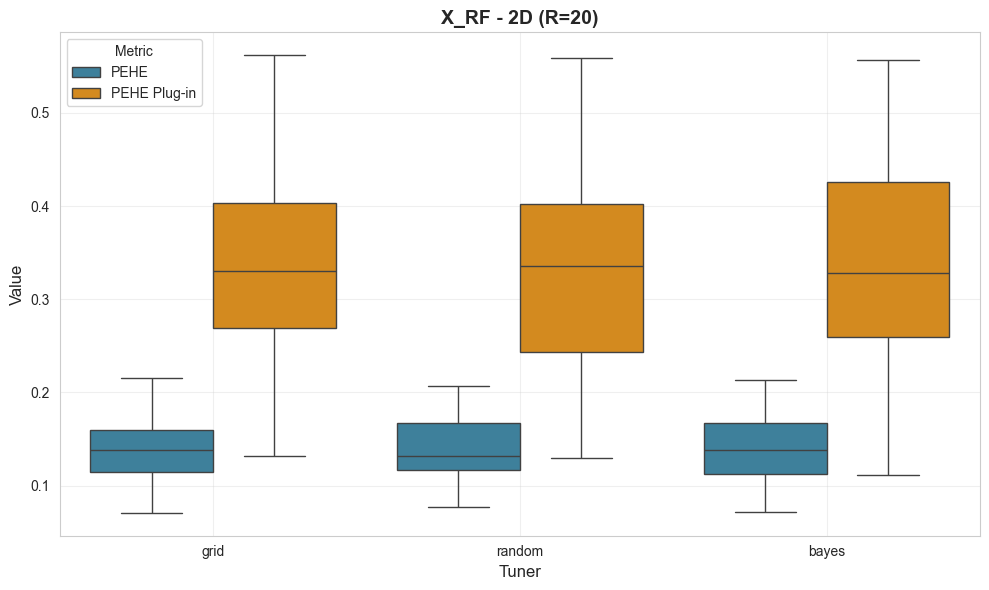

Saved: 2d_x_rf_boxplot_r20.png


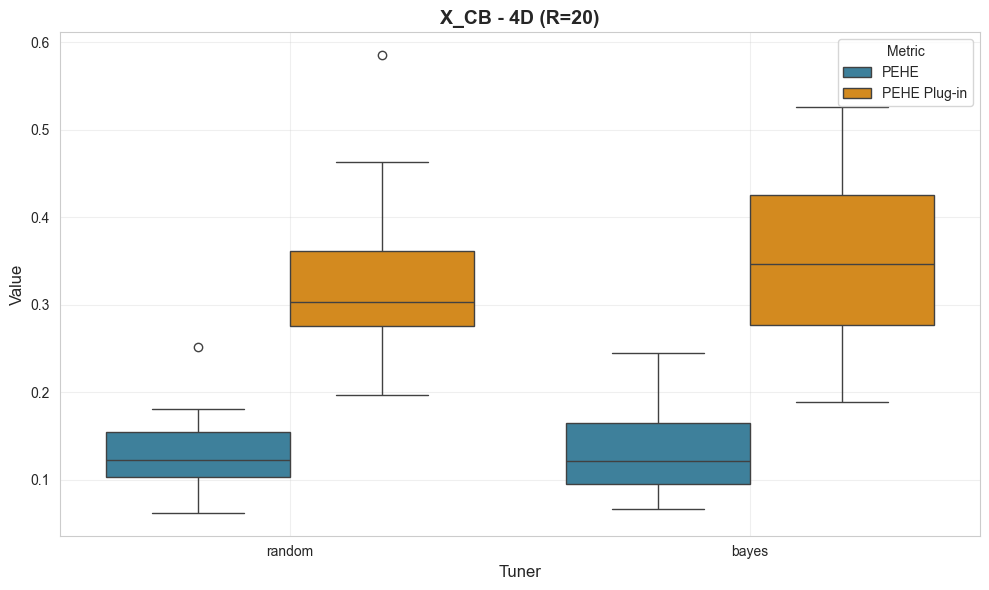

Saved: 4d_x_cb_boxplot_r20.png


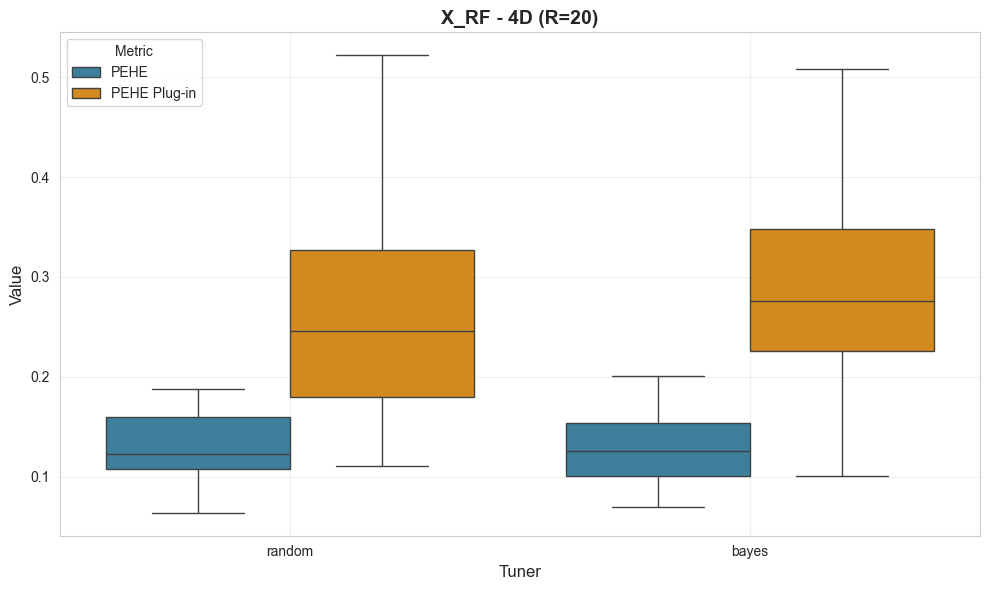

Saved: 4d_x_rf_boxplot_r20.png


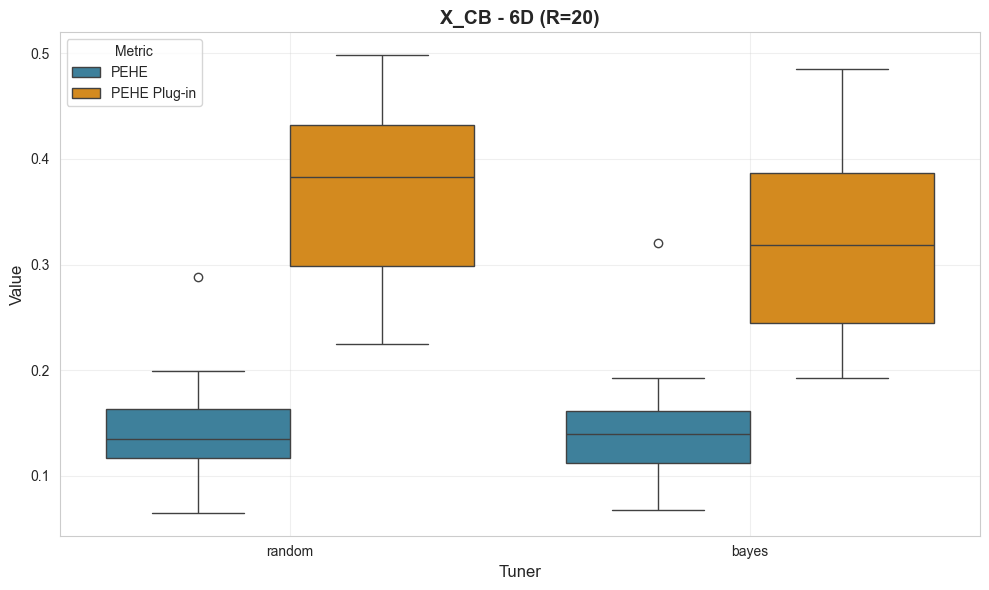

Saved: 6d_x_cb_boxplot_r20.png


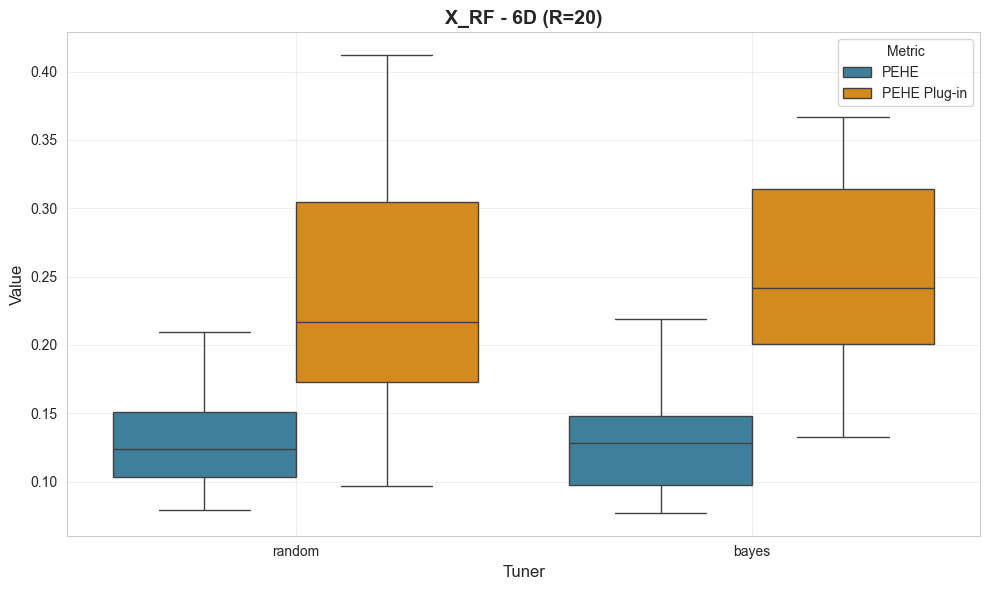

Saved: 6d_x_rf_boxplot_r20.png


In [26]:
# Create separate boxplots for each setting and model combination
for setting in settings:
    for model in models:
        # Create a single plot
        fig, ax = plt.subplots(figsize=(10, 6))
        
        # Filter data for this setting and model
        data = plot_data[(plot_data['setting'] == setting) & (plot_data['model'] == model)]
        
        # Create grouped boxplot with tuner on x-axis and both metrics
        sns.boxplot(data=data, x='tuner', y='value', hue='metric', ax=ax, palette=['#2E86AB', '#F18F01'])
        
        ax.set_title(f'{model.upper()} - {setting.upper()} (R=20)', fontsize=14, fontweight='bold')
        ax.set_xlabel('Tuner', fontsize=12)
        ax.set_ylabel('Value', fontsize=12)
        
        # Fix legend to show correct colors
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles=handles, labels=['PEHE', 'PEHE Plug-in'], title='Metric')
        ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        filename = f'{setting}_{model}_boxplot_r20.png'
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        plt.show()
        print(f"Saved: {filename}")

/var/folders/yg/yd_rkzv93459x04g3jzsjwcr0000gn/T/ipykernel_91447/1699929005.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='model_tuner', y='pehe', ax=ax1,
/var/folders/yg/yd_rkzv93459x04g3jzsjwcr0000gn/T/ipykernel_91447/1699929005.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='model_tuner', y='pehe_plug', ax=ax2,


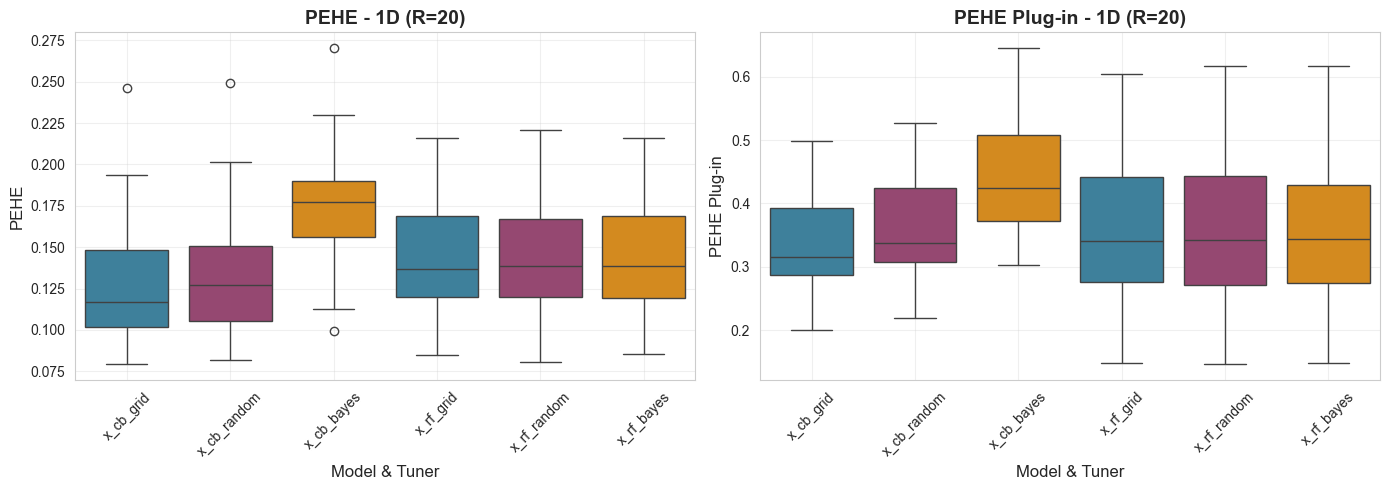

Saved: 1d_boxplot_r20.png


/var/folders/yg/yd_rkzv93459x04g3jzsjwcr0000gn/T/ipykernel_91447/1699929005.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='model_tuner', y='pehe', ax=ax1,
/var/folders/yg/yd_rkzv93459x04g3jzsjwcr0000gn/T/ipykernel_91447/1699929005.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='model_tuner', y='pehe_plug', ax=ax2,


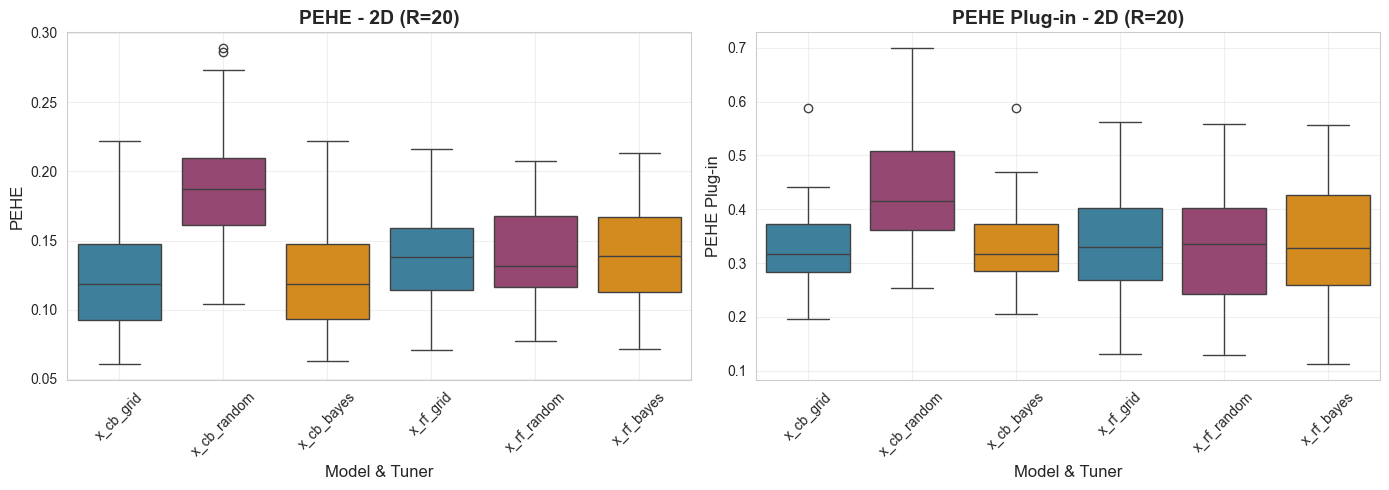

Saved: 2d_boxplot_r20.png


/var/folders/yg/yd_rkzv93459x04g3jzsjwcr0000gn/T/ipykernel_91447/1699929005.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='model_tuner', y='pehe', ax=ax1,
/var/folders/yg/yd_rkzv93459x04g3jzsjwcr0000gn/T/ipykernel_91447/1699929005.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='model_tuner', y='pehe_plug', ax=ax2,


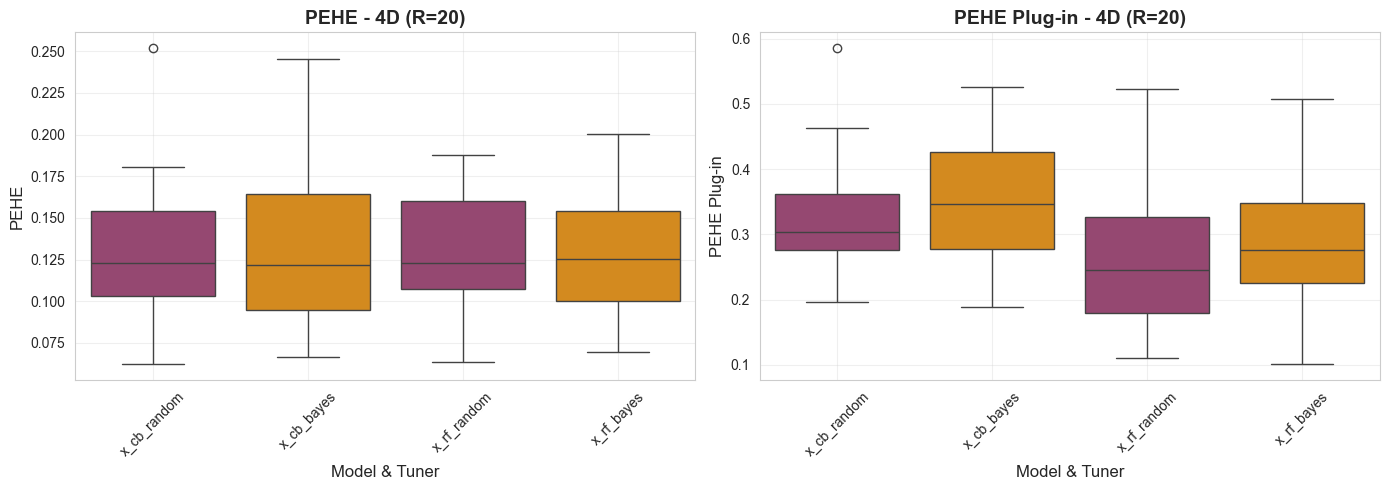

Saved: 4d_boxplot_r20.png


/var/folders/yg/yd_rkzv93459x04g3jzsjwcr0000gn/T/ipykernel_91447/1699929005.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='model_tuner', y='pehe', ax=ax1,
/var/folders/yg/yd_rkzv93459x04g3jzsjwcr0000gn/T/ipykernel_91447/1699929005.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='model_tuner', y='pehe_plug', ax=ax2,


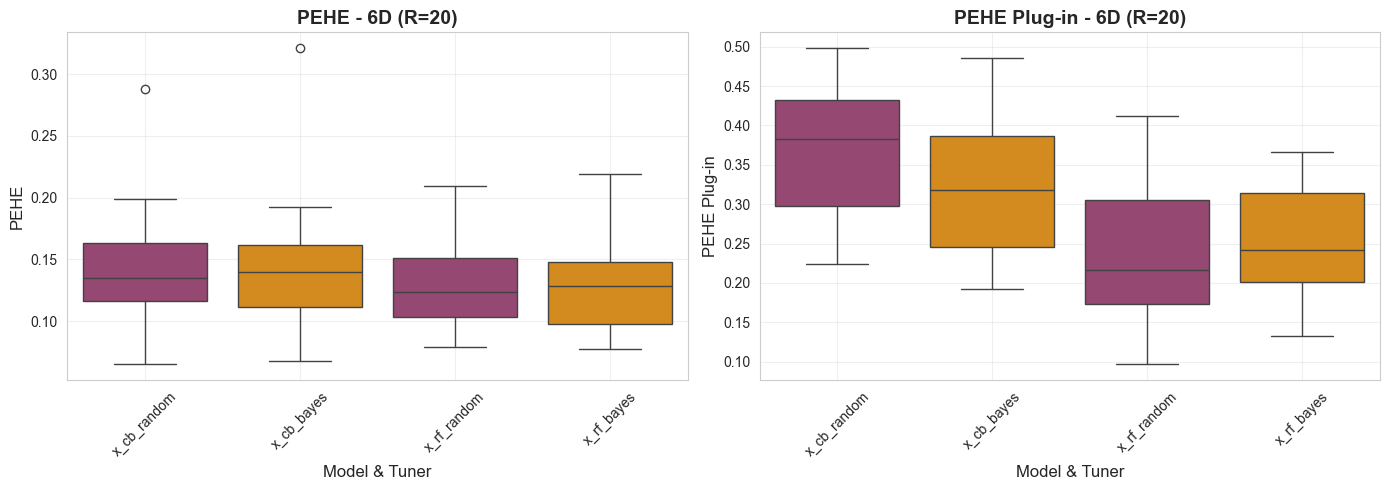

Saved: 6d_boxplot_r20.png


In [27]:
# Create individual boxplots for each setting
for setting in settings:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    data = combined_df[combined_df['setting'] == setting]
    
    # PEHE boxplot
    ax1 = axes[0]
    sns.boxplot(data=data, x='model_tuner', y='pehe', ax=ax1, 
                palette=[get_color(mt) for mt in data['model_tuner'].unique()])
    ax1.set_title(f'PEHE - {setting.upper()} (R=20)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Model & Tuner', fontsize=12)
    ax1.set_ylabel('PEHE', fontsize=12)
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, alpha=0.3)
    
    # PEHE_plug boxplot
    ax2 = axes[1]
    sns.boxplot(data=data, x='model_tuner', y='pehe_plug', ax=ax2, 
                palette=[get_color(mt) for mt in data['model_tuner'].unique()])
    ax2.set_title(f'PEHE Plug-in - {setting.upper()} (R=20)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Model & Tuner', fontsize=12)
    ax2.set_ylabel('PEHE Plug-in', fontsize=12)
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'{setting}_boxplot_r20.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Saved: {setting}_boxplot_r20.png")

## Comparison Across Dimensions

Create boxplots comparing performance across different dimensional settings.

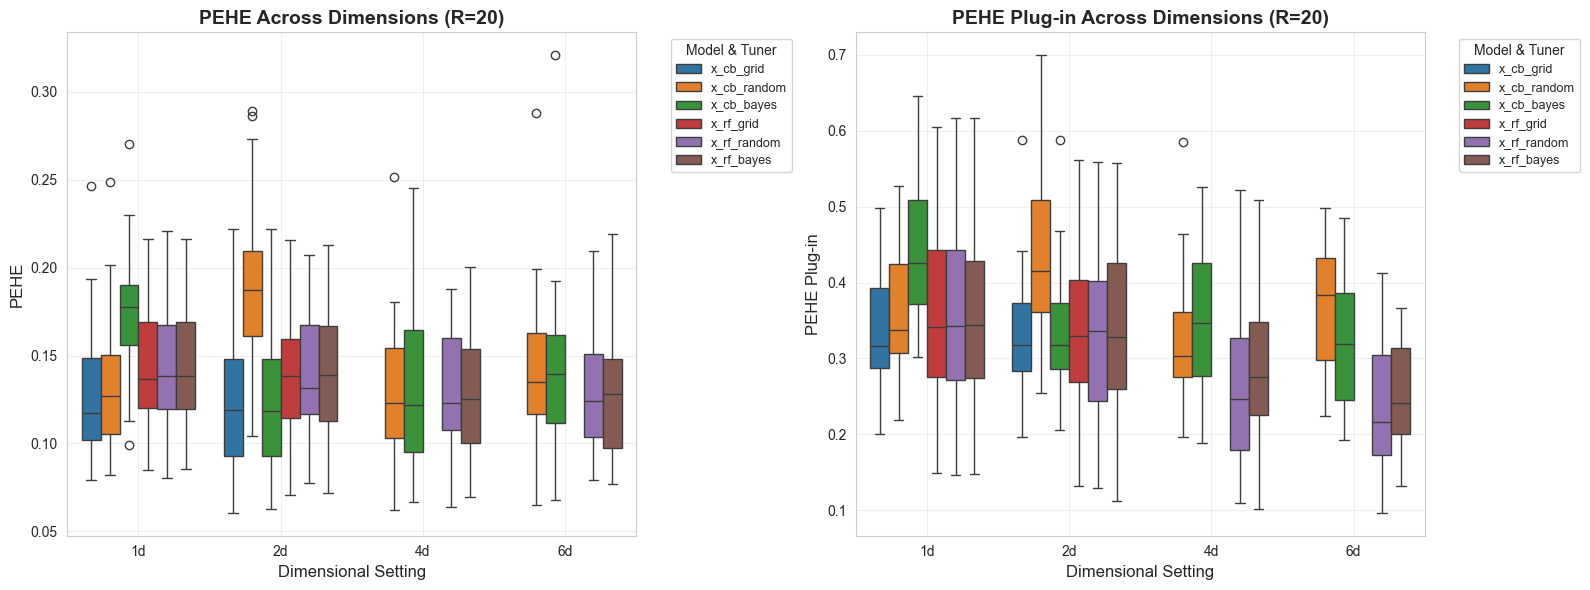

Saved: dimension_comparison_r20.png


In [28]:
# Compare across dimensions for each model-tuner combination
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# PEHE comparison
ax1 = axes[0]
sns.boxplot(data=combined_df, x='setting', y='pehe', hue='model_tuner', ax=ax1)
ax1.set_title('PEHE Across Dimensions (R=20)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Dimensional Setting', fontsize=12)
ax1.set_ylabel('PEHE', fontsize=12)
ax1.legend(title='Model & Tuner', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
ax1.grid(True, alpha=0.3)

# PEHE_plug comparison
ax2 = axes[1]
sns.boxplot(data=combined_df, x='setting', y='pehe_plug', hue='model_tuner', ax=ax2)
ax2.set_title('PEHE Plug-in Across Dimensions (R=20)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Dimensional Setting', fontsize=12)
ax2.set_ylabel('PEHE Plug-in', fontsize=12)
ax2.legend(title='Model & Tuner', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('dimension_comparison_r20.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: dimension_comparison_r20.png")

## Statistical Summary Table

In [24]:
# Create a comprehensive summary table
summary_table = combined_df.groupby(['setting', 'model', 'tuner']).agg({
    'pehe': ['mean', 'std', 'median', 'min', 'max'],
    'pehe_plug': ['mean', 'std', 'median', 'min', 'max'],
    'rep': 'count'
}).round(4)

summary_table.columns = ['_'.join(col).strip() for col in summary_table.columns.values]
summary_table = summary_table.rename(columns={'rep_count': 'n_reps'})

print("\nComprehensive Summary Table (R=20):")
print(summary_table)

# Save to CSV
summary_table.to_csv('summary_statistics_r20.csv')
print("\nSaved: summary_statistics_r20.csv")


Comprehensive Summary Table (R=20):
                      pehe_mean  pehe_std  pehe_median  pehe_min  pehe_max  \
setting model tuner                                                          
1d      x_cb  bayes      0.1758    0.0392       0.1775    0.0991    0.2703   
              grid       0.1302    0.0416       0.1171    0.0792    0.2464   
              random     0.1352    0.0413       0.1272    0.0818    0.2490   
        x_rf  bayes      0.1452    0.0367       0.1386    0.0855    0.2161   
              grid       0.1448    0.0357       0.1366    0.0852    0.2161   
              random     0.1453    0.0379       0.1386    0.0805    0.2210   
2d      x_cb  bayes      0.1236    0.0394       0.1183    0.0626    0.2219   
              grid       0.1243    0.0412       0.1189    0.0605    0.2222   
              random     0.1916    0.0526       0.1874    0.1040    0.2890   
        x_rf  bayes      0.1389    0.0376       0.1387    0.0716    0.2129   
              grid       0.

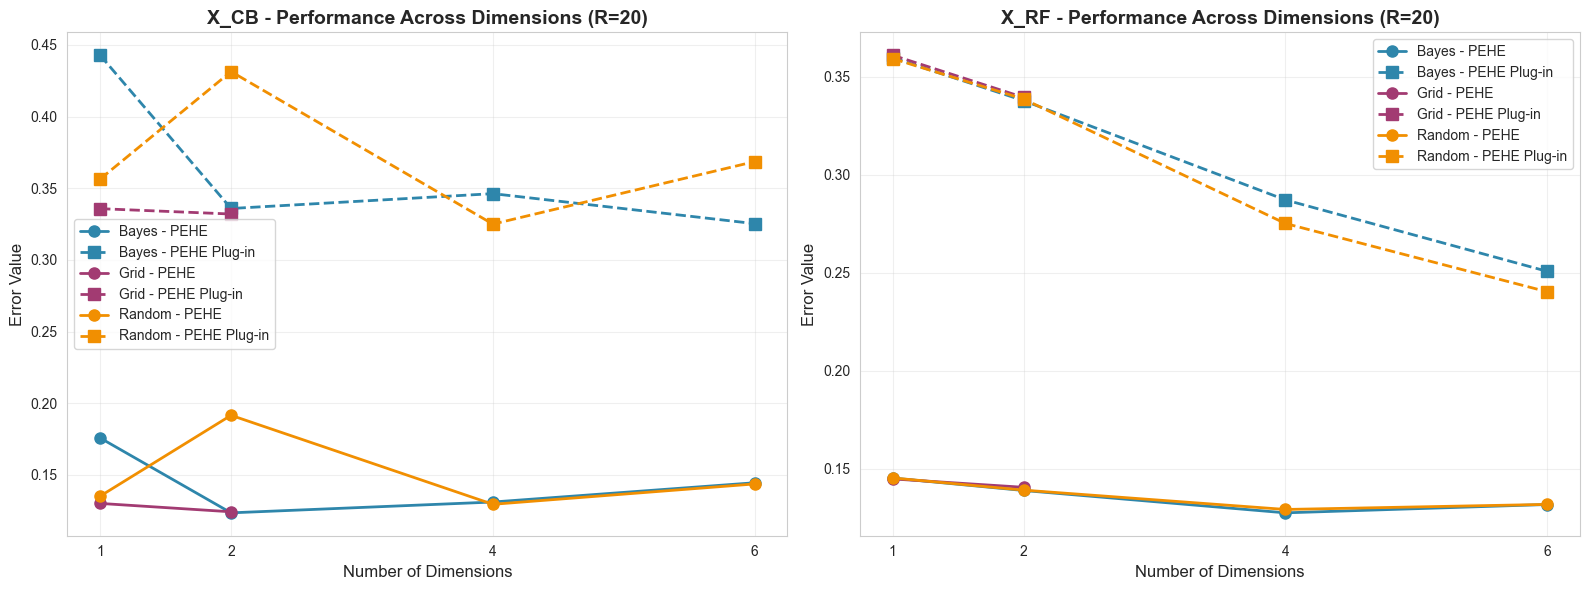

Saved: dimension_comparison_r20.png


In [29]:
# Create comparison plots across dimensions for each model
# Two plots side by side for each model: x_cb and x_rf
# 3 colors for tuners, different line styles for PEHE vs PEHE Plug-in

# Define colors for tuners
tuner_colors = {
    'bayes': '#2E86AB',
    'grid': '#A23B72',
    'random': '#F18F01'
}

# Get mean values for each setting/model/tuner combination
dimension_comparison = combined_df.groupby(['setting', 'model', 'tuner']).agg({
    'pehe': 'mean',
    'pehe_plug': 'mean'
}).reset_index()

# Extract dimension numbers from settings (1d -> 1, 2d -> 2, etc.)
dimension_comparison['dimension'] = dimension_comparison['setting'].str.extract('(\\d+)').astype(int)

# Create figure with 2 subplots (one for each model)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for idx, model in enumerate(models):
    ax = axes[idx]
    model_data = dimension_comparison[dimension_comparison['model'] == model]
    
    # Plot for each tuner
    for tuner in ['bayes', 'grid', 'random']:
        tuner_data = model_data[model_data['tuner'] == tuner].sort_values('dimension')
        
        if len(tuner_data) == 0:
            continue
        
        color = tuner_colors[tuner]
        
        # Plot PEHE with solid line
        ax.plot(tuner_data['dimension'], tuner_data['pehe'], 
                color=color, linestyle='-', linewidth=2, 
                marker='o', markersize=8, label=f'{tuner.capitalize()} - PEHE')
        
        # Plot PEHE Plug-in with dashed line
        ax.plot(tuner_data['dimension'], tuner_data['pehe_plug'], 
                color=color, linestyle='--', linewidth=2, 
                marker='s', markersize=8, label=f'{tuner.capitalize()} - PEHE Plug-in')
    
    ax.set_title(f'{model.upper()} - Performance Across Dimensions (R=20)', 
                 fontsize=14, fontweight='bold')
    ax.set_xlabel('Number of Dimensions', fontsize=12)
    ax.set_ylabel('Error Value', fontsize=12)
    ax.set_xticks([1, 2, 4, 6])
    ax.legend(loc='best', fontsize=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('dimension_comparison_r20.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: dimension_comparison_r20.png")

## Best Performing Configurations

In [25]:
# Find best performing configurations
best_configs = combined_df.groupby(['setting', 'model', 'tuner']).agg({
    'pehe': 'mean',
    'pehe_plug': 'mean'
}).reset_index()

print("\n" + "="*80)
print("BEST PERFORMING CONFIGURATIONS BY PEHE (R=20)")
print("="*80)

for setting in settings:
    print(f"\n{setting.upper()}:")
    setting_data = best_configs[best_configs['setting'] == setting].sort_values('pehe')
    print(setting_data.to_string(index=False))

print("\n" + "="*80)
print("OVERALL BEST CONFIGURATIONS")
print("="*80)
print("\nTop 5 by PEHE:")
print(best_configs.sort_values('pehe').head().to_string(index=False))
print("\nTop 5 by PEHE Plug-in:")
print(best_configs.sort_values('pehe_plug').head().to_string(index=False))


BEST PERFORMING CONFIGURATIONS BY PEHE (R=20)

1D:
setting model  tuner     pehe  pehe_plug
     1d  x_cb   grid 0.130151   0.335798
     1d  x_cb random 0.135230   0.356462
     1d  x_rf   grid 0.144766   0.361084
     1d  x_rf  bayes 0.145213   0.359811
     1d  x_rf random 0.145270   0.359342
     1d  x_cb  bayes 0.175822   0.442866

2D:
setting model  tuner     pehe  pehe_plug
     2d  x_cb  bayes 0.123575   0.335918
     2d  x_cb   grid 0.124302   0.332065
     2d  x_rf  bayes 0.138858   0.337894
     2d  x_rf random 0.139044   0.338711
     2d  x_rf   grid 0.140492   0.339558
     2d  x_cb random 0.191626   0.431457

4D:
setting model  tuner     pehe  pehe_plug
     4d  x_rf  bayes 0.127448   0.287219
     4d  x_rf random 0.129171   0.275174
     4d  x_cb random 0.129537   0.325031
     4d  x_cb  bayes 0.131122   0.346280

6D:
setting model  tuner     pehe  pehe_plug
     6d  x_rf  bayes 0.131703   0.250730
     6d  x_rf random 0.131759   0.240309
     6d  x_cb random 0.143745  